# k - means 2D / 3D

3D가 시간소모가 심하여, 2D에서 세부분류하는 방식을 시도.     
1차로 클러스터링 진행 후 각각 군집별 데이터 셋 만든 후     
2차 클러스터링 진행      
세부분류의 결과값을 살펴보니, 어떤방식으로 군집화가 되었는지 해석이 힘들었다.   
군집의 결과의 차이가 드러나지 않았다.     


In [45]:
# Module
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# K-Means(2D)
참고 : https://medium.com/@nsh235482/k-means-clustering-6ab85a2a32ad

In [80]:
songs = pd.read_csv('./song_data.csv')

In [81]:
songs.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [82]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null int64
song_duration_ms    18835 non-null int64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18835 non-null float64
instrumentalness    18835 non-null float64
key                 18835 non-null int64
liveness            18835 non-null float64
loudness            18835 non-null float64
audio_mode          18835 non-null int64
speechiness         18835 non-null float64
tempo               18835 non-null float64
time_signature      18835 non-null int64
audio_valence       18835 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [83]:
songs.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [84]:
# 연속변수로 구성된 컬럼만 선택하여 데이터프레임 만들기
target_col = ['song_popularity','song_duration_ms','acousticness','danceability','energy','instrumentalness',
              'liveness','loudness','speechiness','tempo','audio_valence']
df = songs[target_col]

In [85]:
# 표준화 필요한 컬럼 : popularity, duration_ms, key, loudness, tempo,time_signature

In [86]:
cols = ['song_popularity', 'song_duration_ms', 'key', 'loudness', 'tempo','time_signature']

In [87]:
# 위의 6개 컬럼 표준화
data = songs[cols]
standardized_data = MinMaxScaler().fit_transform(data)

In [88]:
standardized_data

array([[0.73      , 0.1400585 , 0.72727273, 0.85924219, 0.68942464,
        0.8       ],
       [0.66      , 0.11465771, 0.27272727, 0.80194781, 0.43437136,
        0.8       ],
       [0.76      , 0.12293814, 0.        , 0.76673358, 0.51123317,
        0.8       ],
       ...,
       [0.23      , 0.09523114, 0.        , 0.65784452, 0.53868883,
        0.8       ],
       [0.55      , 0.19038284, 0.27272727, 0.66285035, 0.4377017 ,
        0.8       ],
       [0.6       , 0.10156567, 0.36363636, 0.66855005, 0.37756172,
        0.8       ]])

In [89]:
df = pd.DataFrame(standardized_data)
df.head()

,0,1,2,3,4,5
0,0.73,0.140059,0.727273,0.859242,0.689425,0.8
1,0.66,0.114658,0.272727,0.801948,0.434371,0.8
2,0.76,0.122938,0.000000,0.766734,0.511233,0.8
3,0.74,0.114658,0.000000,0.838352,0.505303,0.8
4,0.56,0.118514,0.909091,0.835204,0.709856,0.8


In [90]:
df1 = df.rename(columns={0: 'popularity', 1: 'duration_ms', 2: 'key', 3: 'loudness', 4: 'tempo', 5: 'time_signature'})
df1.head()

,popularity,duration_ms,key,loudness,tempo,time_signature
0,0.73,0.140059,0.727273,0.859242,0.689425,0.8
1,0.66,0.114658,0.272727,0.801948,0.434371,0.8
2,0.76,0.122938,0.000000,0.766734,0.511233,0.8
3,0.74,0.114658,0.000000,0.838352,0.505303,0.8
4,0.56,0.118514,0.909091,0.835204,0.709856,0.8


In [91]:
cols_2 = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',
          'audio_valence']
df2 = songs[cols_2]
df2.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,audio_valence
0,0.005520,0.496,0.682,0.000029,0.0589,0.0294,0.474
1,0.010300,0.542,0.853,0.000000,0.1080,0.0498,0.370
2,0.008170,0.737,0.463,0.447000,0.2550,0.0792,0.324
3,0.026400,0.451,0.970,0.003550,0.1020,0.1070,0.198
4,0.000954,0.447,0.766,0.000000,0.1130,0.0313,0.574


In [92]:
# int, float 컬럼 중 표준화 안 해도 되는 컬럼과 표준화한 컬럼 합치기
songs_1 = pd.concat([df1, df2], axis=1)
songs_1.head()

,popularity,duration_ms,key,loudness,tempo,time_signature,acousticness,danceability,energy,instrumentalness,liveness,speechiness,audio_valence
0,0.73,0.140059,0.727273,0.859242,0.689425,0.8,0.005520,0.496,0.682,0.000029,0.0589,0.0294,0.474
1,0.66,0.114658,0.272727,0.801948,0.434371,0.8,0.010300,0.542,0.853,0.000000,0.1080,0.0498,0.370
2,0.76,0.122938,0.000000,0.766734,0.511233,0.8,0.008170,0.737,0.463,0.447000,0.2550,0.0792,0.324
3,0.74,0.114658,0.000000,0.838352,0.505303,0.8,0.026400,0.451,0.970,0.003550,0.1020,0.1070,0.198
4,0.56,0.118514,0.909091,0.835204,0.709856,0.8,0.000954,0.447,0.766,0.000000,0.1130,0.0313,0.574


# 1차 군집화

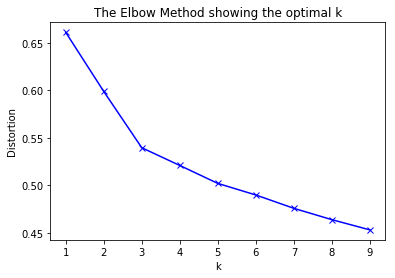

In [59]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(songs_1)
    kmeanModel.fit(songs_1)
    distortions.append(sum(np.min(cdist(songs_1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / songs_1.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
# 최적의 클러스터 갯수 찾기: Silhouette Coefficient(계수가 가장 높은 것이 최적 클러스터 갯수)
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(songs_1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(songs_1, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.23946431665519782
For n_clusters=3, The Silhouette Coefficient is 0.19696332634274835
For n_clusters=4, The Silhouette Coefficient is 0.20103187679718745
For n_clusters=5, The Silhouette Coefficient is 0.1622804724923985
For n_clusters=6, The Silhouette Coefficient is 0.136525324109204
For n_clusters=7, The Silhouette Coefficient is 0.13218055061083364
For n_clusters=8, The Silhouette Coefficient is 0.1431880248303223
For n_clusters=9, The Silhouette Coefficient is 0.14481219057240016
For n_clusters=10, The Silhouette Coefficient is 0.14387813575323605


In [93]:
# Fit the model.
model = KMeans(n_clusters=3).fit(songs_1)

In [94]:
# Get results.
songs_1['cluster_1'] = model.predict(songs_1)

In [95]:
songs_1['cluster_1'].unique()

array([0, 1, 2])

In [96]:
songs_1['title'] = list(songs['song_name'])

Text(0.5, 1.0, '2D K-means Result')

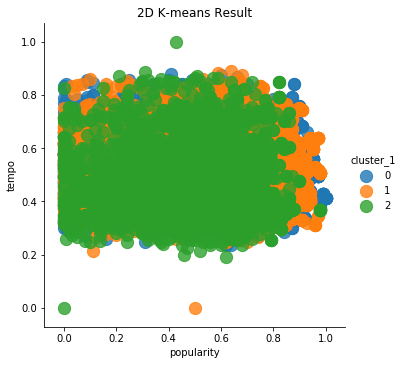

In [66]:
# fit_reg = False는 회귀 옵션 제거, scatter_kws = {"s":50}는 산점도 그래프 점 크기 설정
sb.lmplot('popularity','tempo', data = songs_1, fit_reg = False, scatter_kws = {"s":150}, hue = "cluster_1")
plt.title('2D K-means Result')

In [97]:
a = songs_1[songs_1['cluster_1'] == 0]
b = songs_1[songs_1['cluster_1'] == 1]
c = songs_1[songs_1['cluster_1'] == 2]

In [98]:
print(len(a))
print(len(b))
print(len(c))

7718
7560
3557


In [99]:
print(a.mean())
print(b.mean())
print(c.mean())

popularity          0.536718
duration_ms         0.116544
key                 0.774977
loudness            0.802561
tempo               0.506389
time_signature      0.795906
acousticness        0.146699
danceability        0.653097
energy              0.715173
instrumentalness    0.051599
liveness            0.182865
speechiness         0.111953
audio_valence       0.559966
cluster_1           0.000000
dtype: float64
popularity          0.541303
duration_ms         0.117166
key                 0.184223
loudness            0.801490
tempo               0.505939
time_signature      0.797646
acousticness        0.143306
danceability        0.650804
energy              0.711149
instrumentalness    0.053826
liveness            0.187001
speechiness         0.104582
audio_valence       0.555182
cluster_1           1.000000
dtype: float64
popularity          0.490970
duration_ms         0.109022
key                 0.473024
loudness            0.665062
tempo               0.471638
time_signatur

# 2차 군집화

In [100]:
# cluster_1 = a

In [118]:
a_1 = a.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

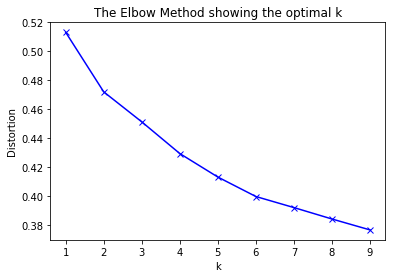

In [119]:
# 최적의 클러스터 갯수 찾기: Elbow Method
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(a_1)
    kmeanModel.fit(a_1)
    distortions.append(sum(np.min(cdist(a_1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / a_1.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [123]:
# Fit the model.
model = KMeans(n_clusters=4).fit(a_1)
a['cluster_2'] = model.predict(a_1)

In [124]:
a.head()

,popularity,duration_ms,key,loudness,tempo,time_signature,acousticness,danceability,energy,instrumentalness,liveness,speechiness,audio_valence,cluster_1,title,cluster_2
0,0.73,0.140059,0.727273,0.859242,0.689425,0.8,0.005520,0.496,0.682,0.000029,0.0589,0.0294,0.474,0,Boulevard of Broken Dreams,1
4,0.56,0.118514,0.909091,0.835204,0.709856,0.8,0.000954,0.447,0.766,0.000000,0.1130,0.0313,0.574,0,How You Remind Me,1
9,0.81,0.107056,0.818182,0.820633,0.633044,0.8,0.001720,0.542,0.905,0.010400,0.1360,0.0540,0.374,0,Sex on Fire,1
11,0.63,0.097119,0.818182,0.857805,0.454023,0.8,0.004600,0.496,0.863,0.000000,0.6390,0.0381,0.243,0,Numb,1
12,0.75,0.110368,0.818182,0.856021,0.523865,0.8,0.004340,0.647,0.964,0.003600,0.1500,0.0600,0.875,0,Smooth Criminal,3


In [129]:
#a[a['cluster_2'] == 0] # 주로 rock음악
#a[a['cluster_2'] == 1] # 주로 rock음악, elec
a[a['cluster_2'] == 2] # 주로 rock음악, elec

,popularity,duration_ms,key,loudness,tempo,time_signature,acousticness,danceability,energy,instrumentalness,liveness,speechiness,audio_valence,cluster_1,title,cluster_2
36,0.11,0.143997,0.818182,0.860605,0.713872,0.8,0.000917,0.433,0.959,0.000000,0.0280,0.0431,0.365,0,The Pretender,2
91,0.38,0.124415,0.818182,0.872153,0.379856,0.8,0.003230,0.543,0.847,0.000000,0.0551,0.0659,0.650,0,Como,2
100,0.39,0.067765,0.636364,0.744331,0.508254,0.8,0.108000,0.703,0.617,0.000056,0.2710,0.0731,0.435,0,Don't Werk,2
104,0.46,0.113578,0.727273,0.860209,0.412128,0.8,0.007900,0.493,0.825,0.000000,0.1290,0.0798,0.621,0,Nuestra Cancion Pt. 2 (feat. Arcángel),2
106,0.37,0.083416,1.000000,0.845315,0.495110,0.8,0.004360,0.701,0.779,0.000000,0.1210,0.0647,0.451,0,Dinero - English Version,2
121,0.10,0.128645,0.818182,0.814537,0.536464,0.8,0.159000,0.745,0.666,0.000000,0.3020,0.0566,0.708,0,Beautiful Girls,2
184,0.31,0.119141,0.545455,0.846381,0.454209,0.8,0.025100,0.815,0.808,0.000005,0.1200,0.0511,0.746,0,Caught Up,2
200,0.24,0.147287,0.727273,0.807301,0.429209,0.8,0.439000,0.820,0.717,0.001070,0.2360,0.0722,0.843,0,La Vida Es Un Carnaval,2
282,0.13,0.060522,0.727273,0.748445,0.714115,0.8,0.714000,0.599,0.704,0.000000,0.5210,0.2430,0.950,0,Hit the Road Jack,2
285,0.37,0.120237,0.636364,0.719525,0.571055,0.8,0.462000,0.456,0.514,0.000370,0.2680,0.0530,0.657,0,Summertime Blues,2
